In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## EDA

In [ ]:
df1 = pd.read_csv('ad_click_dataset.csv')

df1 = df1.drop_duplicates()

df1 = df1.dropna()

df1.info()

In [ ]:
df1.describe().T

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df1['age'],bins=30,kde=True)
plt.title('Age Distribution')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(df1['gender'].value_counts(),labels=df1['gender'].value_counts().index,autopct='%1.1f')
plt.title('Gender Distribution')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(df1['browsing_history'].value_counts(),labels=df1['browsing_history'].value_counts().index,autopct='%1.1f')
plt.title('Interest Distribution')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(df1['click'].value_counts(),labels=df1['click'].value_counts().index,autopct='%1.1f')
plt.title('Clicked Distribution')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='browsing_history',data=df1,hue='click')
plt.title('Browsing History vs Clicked')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='click', y='age', data=df1)
plt.title('Age vs Clicked')
plt.xlabel('Clicked')
plt.ylabel('Age')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='time_of_day',data=df1,hue='click')
plt.title('Time of Day vs Click')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='time_of_day', y='age', hue='click', data=df1, palette='viridis')
plt.title('Age vs Time of Day with Click')
plt.xlabel('Time of Day')
plt.ylabel('Age')
plt.show()

###################################################################################################

In [12]:
df1 = df1.drop(columns=['id', 'full_name'])
df1 = df1.reset_index(drop=True)

In [ ]:
# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df1, drop_first=True).astype(int)

df_encoded.info()

In [14]:
df_encoded = df_encoded[[col for col in df_encoded.columns if col != 'click'] + ['click']]

In [ ]:
df_encoded.describe().T.round(3)

In [ ]:
vif_data = pd.DataFrame()
vif_data["Variable"] = df_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(df_encoded.values, i) for i in range(df_encoded.shape[1])]

vif_data

VIF = 1: No multicollinearity (the variable is not correlated with other predictors).

1 < VIF < 5: Moderate multicollinearity (usually acceptable).

VIF > 5: High multicollinearity, and it might be problematic. You should consider investigating this variable further or possibly removing it.

VIF > 10: Strong indication of severe multicollinearity. This typically suggests that the predictor is highly correlated with others, and the model's coefficients may be unreliable.

###############################################################################################

## Preprocessing

In [ ]:
df_encoded.head()

In [18]:
scaler = MinMaxScaler()
df_scaled_minmax = scaler.fit_transform(df_encoded.iloc[:, :-1])

In [ ]:
df_scaled_minmax = pd.DataFrame(df_scaled_minmax, columns=['age', 'gender_Male', 
'gender_Non-Binary', 'device_type_Mobile', 'device_type_Tablet', 'ad_position_Side', 
'ad_position_Top', 'browsing_history_Entertainment', 'browsing_history_News', 
'browsing_history_Shopping', 'browsing_history_Social Media', 'time_of_day_Evening', 
'time_of_day_Morning', 'time_of_day_Night']
)
df_scaled_minmax.describe().T.round(3)

In [20]:
scaler = StandardScaler()
df_scaled_standard = scaler.fit_transform(df_encoded.iloc[:, :-1])

In [ ]:
df_scaled_standard = pd.DataFrame(df_scaled_standard, columns=['age', 'gender_Male', 
'gender_Non-Binary', 'device_type_Mobile', 'device_type_Tablet', 'ad_position_Side', 
'ad_position_Top', 'browsing_history_Entertainment', 'browsing_history_News', 
'browsing_history_Shopping', 'browsing_history_Social Media', 'time_of_day_Evening', 
'time_of_day_Morning', 'time_of_day_Night']
)
df_scaled_standard.describe().T.round(3)

In [ ]:
vif_data = pd.DataFrame()
vif_data["Variable"] = df_scaled_standard.columns
vif_data["VIF"] = [variance_inflation_factor(df_scaled_standard.values, i) for i in range(df_scaled_standard.shape[1])]

vif_data

In [ ]:
vif_data = pd.DataFrame()
vif_data["Variable"] = df_scaled_minmax.columns
vif_data["VIF"] = [variance_inflation_factor(df_scaled_minmax.values, i) for i in range(df_scaled_minmax.shape[1])]

vif_data

In [ ]:
df_scaled_minmax.head()

## Model Selection

In [25]:
X=df_scaled_minmax
y=df_encoded['click']

In [26]:
# rus = RandomUnderSampler(random_state=42)
# X1, y2 = rus.fit_resample(X, y)

In [27]:
smote = SMOTE(random_state=42)

X1, y2= smote.fit_resample(X, y)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X1,y2,test_size=0.3,random_state=42)

# Linear Regression

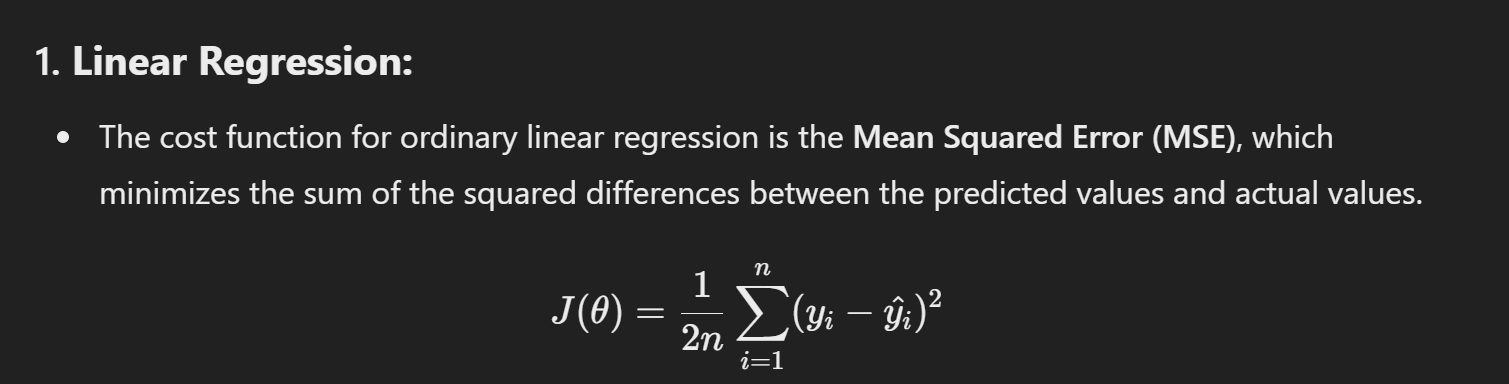

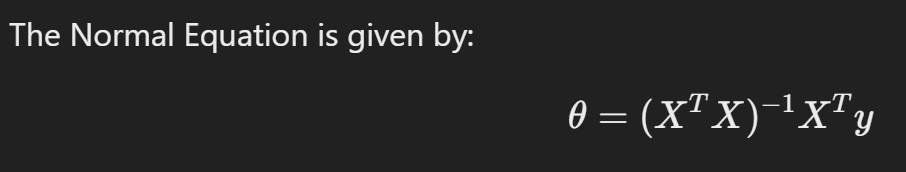

In [ ]:
model = LinearRegression()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

print("========================================")
print("Intercept:\n", model.intercept_)
print("========================================")
print("Coefficients:\n", model.coef_)
print("========================================")
print("Mean Squared Error:\n", mean_squared_error(y_test, y_pred))
print("========================================")
print("R-squared:\n", r2_score(y_test, y_pred))
print("========================================")
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
print("Accuracy:\n", accuracy_score(y_test, y_pred_binary))
print("========================================")
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:\n", conf_matrix)

In [ ]:
coefficient = model.coef_

coefficients = model.coef_
coefficients_mapped = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

coefficients_mapped

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(coefficients_mapped['Feature'], coefficients_mapped['Coefficient'], color='skyblue')
plt.title('Feature Coefficients in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), (y_test - y_pred) ** 2, color='blue', label='Squared Errors')
plt.axhline(y=mse, color='red', linestyle='--', label=f'MSE: {mse:.3f}')
plt.title('Mean Squared Error (MSE) of Predictions')
plt.xlabel('Test Data Index')
plt.ylabel('Squared Error')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Scatter plot of actual vs predicted values for both training and test sets
plt.figure(figsize=(14, 6))

# Training data scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Clicks')
plt.ylabel('Predicted Clicks')
plt.grid(True)

# Test data scatter plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Actual Clicks')
plt.ylabel('Predicted Clicks')
plt.grid(True)

plt.tight_layout()
plt.show()


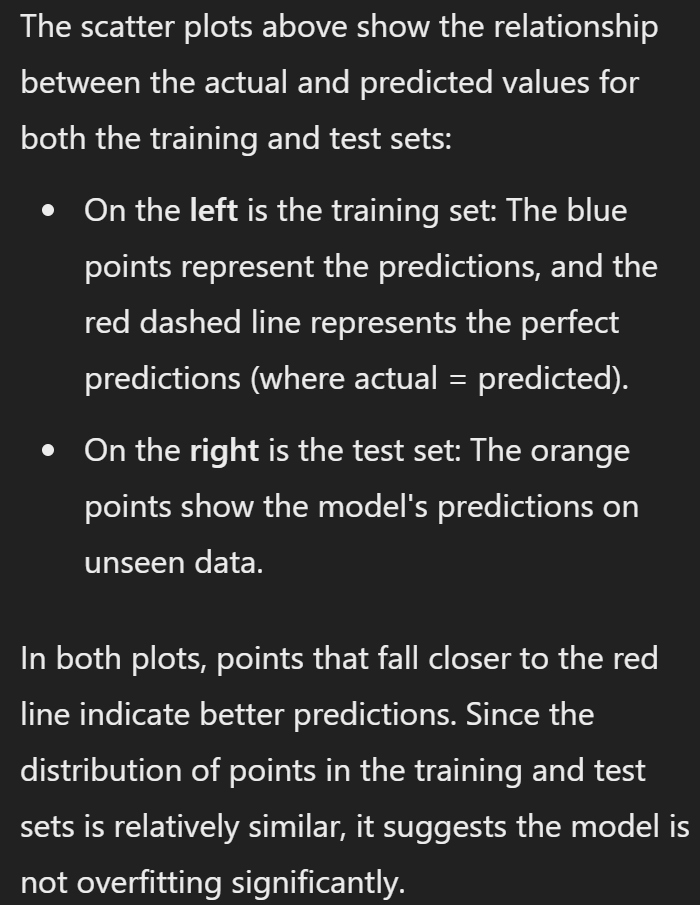

# Lasso

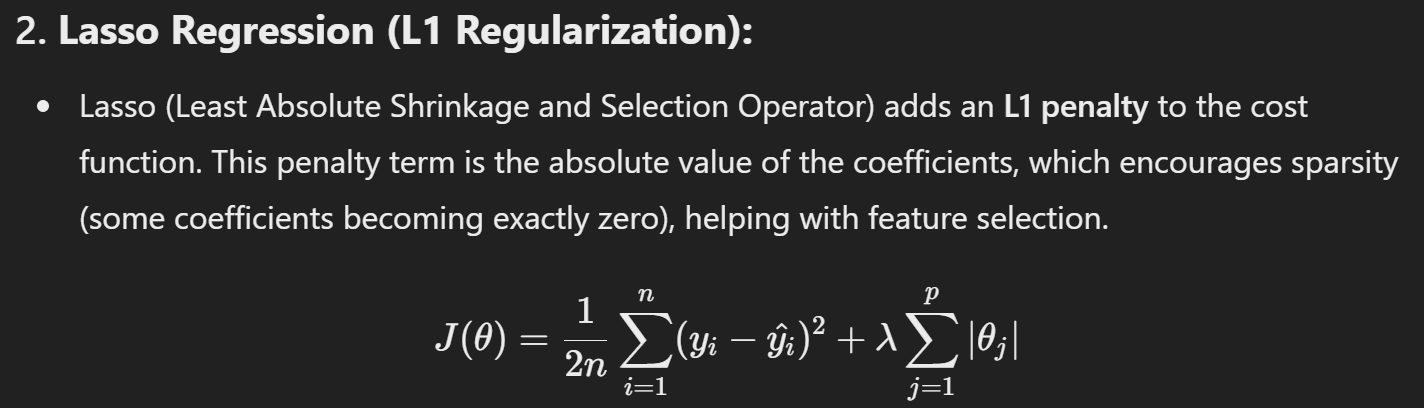

In [ ]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X , y)
lasso_model_y_pred = lasso_model.predict(x_test)

print("========================================")
print("Intercept:\n", lasso_model.intercept_)
print("========================================")
print("Coefficients:\n", lasso_model.coef_)
print("========================================")
print("Mean Squared Error:\n", mean_squared_error(y_test, lasso_model_y_pred))
print("========================================")
print("R-squared:\n", r2_score(y_test, lasso_model_y_pred))
print("========================================")
y_pred_binary_lasso = [1 if pred >= 0.5 else 0 for pred in lasso_model_y_pred]
print("Accuracy:\n", accuracy_score(y_test, y_pred_binary_lasso))
print("========================================")
conf_matrix_lasso = confusion_matrix(y_test, y_pred_binary_lasso)
print("Confusion Matrix:\n", conf_matrix_lasso)

In [ ]:
lasso_coefficients = lasso_model.coef_

# Display the coefficients along with the feature names
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_coefficients
})
coefficients_df

In [ ]:
# Plot the coefficients (feature importance) for the Lasso model
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], align='center' , color='orange')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Lasso Regression')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

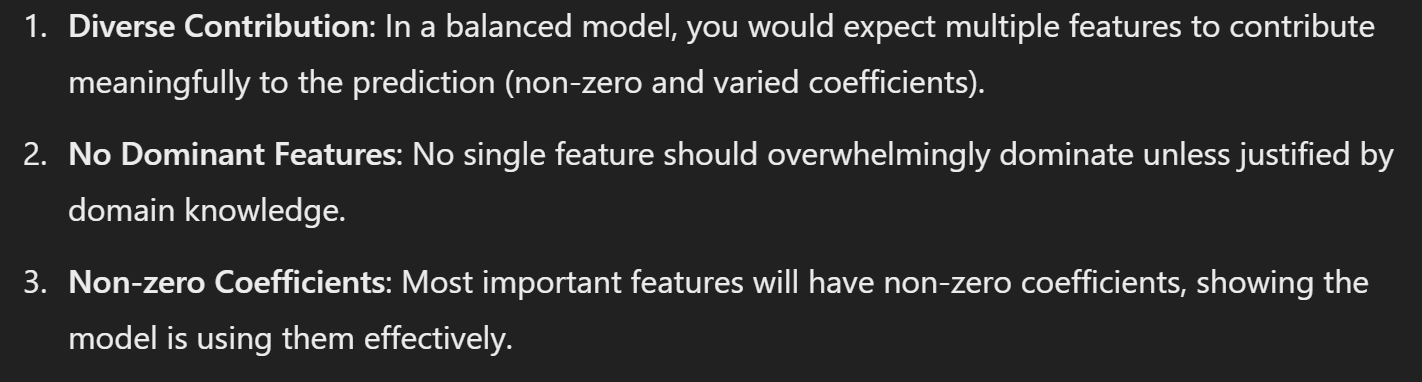

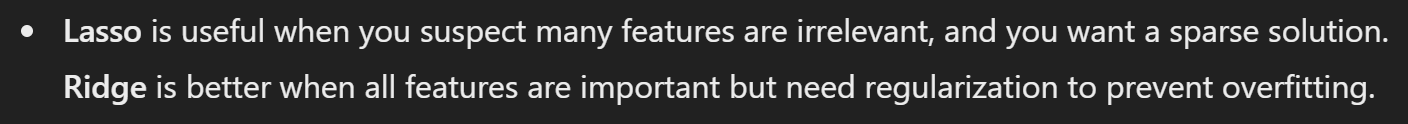

# Ridge

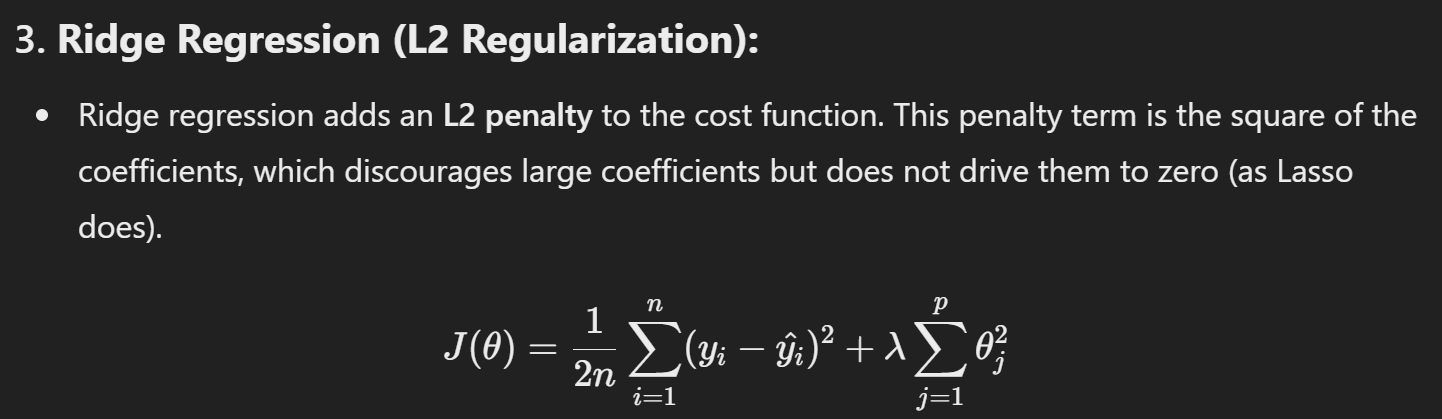

In [ ]:
ridge_model = Ridge(alpha=100)
ridge_model.fit(X , y)
y_pred_ridge_model = ridge_model.predict(x_test)


print("========================================")
print("Intercept:\n", ridge_model.intercept_)
print("========================================")
print("Coefficients:\n", ridge_model.coef_)
print("========================================")
print("Mean Squared Error:\n", mean_squared_error(y_test, y_pred_ridge_model))
print("========================================")
print("R-squared:\n", r2_score(y_test, y_pred_ridge_model))
print("========================================")
y_pred_binary_ridge = [1 if pred >= 0.5 else 0 for pred in y_pred_ridge_model]
print("Accuracy:\n", accuracy_score(y_test, y_pred_binary_ridge))
print("========================================")
conf_matrix_ridge = confusion_matrix(y_test, y_pred_binary_ridge)
print("Confusion Matrix:\n", conf_matrix_ridge)

In [ ]:
ridge_coefficients = ridge_model.coef_

Coefficient_df_1 = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_coefficients
})

Coefficient_df_1

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(Coefficient_df_1['Feature'], Coefficient_df_1['Coefficient'], align='center' , color='orange')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Ridge Regression')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

A positive coefficient means that as the feature increases, the likelihood of a click increases (increases the predicted value of click).

A negative coefficient means that as the feature increases, the likelihood of a click decreases (decreases the predicted value of click).

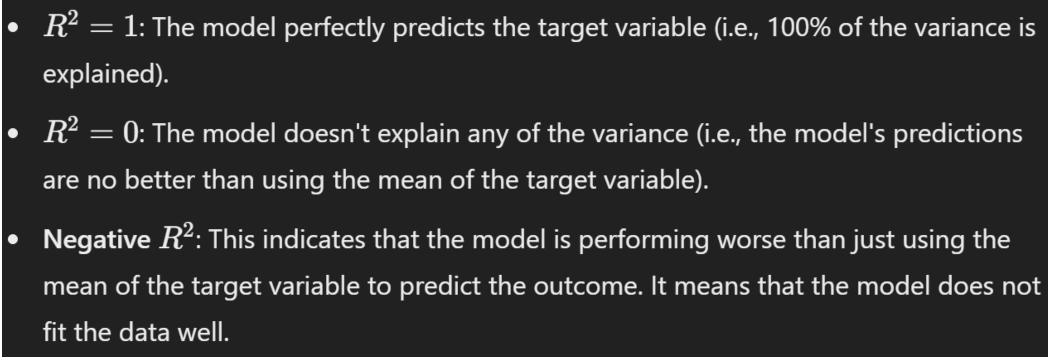

# Logistic Regression

In [ ]:
logistic_model = LogisticRegression(C=1, max_iter=100, penalty='l2', solver='liblinear')

logistic_model.fit(x_train, y_train)

y_pred_logistic = logistic_model.predict(x_test)

classification_rep = classification_report(y_test, y_pred_logistic)


y_pred_prob = logistic_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)


print("Classification Report:\n", classification_rep)

print("========================================")
print("Intercept:\n", logistic_model.intercept_)
print("========================================")
print("Coefficients:\n", logistic_model.coef_)
print("========================================")
print("Mean Squared Error:\n", mean_squared_error(y_test, y_pred_logistic))
print("========================================")
print("R-squared:\n", r2_score(y_test, y_pred_logistic))
print("========================================")
y_pred_binary_logistic = [1 if pred >= 0.5 else 0 for pred in y_pred_logistic]
print("Accuracy:\n", accuracy_score(y_test, y_pred_binary_logistic))
print("========================================")
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix:\n", conf_matrix_logistic)

In [ ]:
Logistic_coefficients = logistic_model.coef_

Coefficient_df_3 = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': Logistic_coefficients[0]
})

Coefficient_df_3


In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(Coefficient_df_3['Feature'], Coefficient_df_3['Coefficient'], align='center' , color='orange')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define a parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers that support l1 and elasticnet
    'max_iter': [100, 200]  # Number of iterations for convergence
}

# Initialize logistic regression model
logistic_model = LogisticRegression()

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

# KNN

In [45]:
knn = KNeighborsClassifier(n_neighbors=2, weights='distance', metric='manhattan')

knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

classification_rep = classification_report(y_test, y_pred_knn)

In [ ]:
print("Classification Report:\n", classification_rep)

print("========================================")
print("Mean Squared Error:\n", mean_squared_error(y_test, y_pred_knn))
print("========================================")
print("R-squared:\n", r2_score(y_test, y_pred_knn))
print("========================================")
y_pred_binary_knn = [1 if pred >= 0.5 else 0 for pred in y_pred_knn]
print("Accuracy:\n", accuracy_score(y_test, y_pred_binary_knn))
print("========================================")
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix_knn)

In [ ]:
y_pred_prob_knn = knn.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)

roc_auc = roc_auc_score(y_test, y_pred_prob_knn)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search over
param_grid = {
    'n_neighbors': [2,3,4, 5,6, 7,8, 9,10, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score